In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [4]:
df=pd.read_csv( r"C:\Users\kareem Mahmoud\Downloads\datasets\Restaurant_Reviews.tsv",delimiter='\t',quoting=3)
df.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

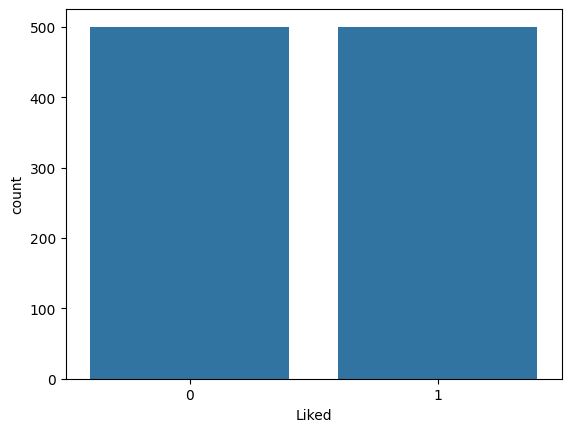

In [7]:
sns.countplot(x=df['Liked'])

In [12]:
max_length = df['Review'].apply(len).max()
longest_reviews = df[df['Review'].apply(len) == max_length]
print(longest_reviews)


                                                Review  Liked
985  The problem I have is that they charge $11.99 ...      0


In [13]:
min_length = df['Review'].apply(len).min()
longest_reviews = df[df['Review'].apply(len) == min_length]
print(longest_reviews)

          Review  Liked
165  DELICIOUS!!      1
479  I LOVED it!      1
581  Over rated.      0
648  Great food.      1
663  Both great!      1


In [14]:
df['Review letter count']=df['Review'].apply(len)

In [15]:
df.head(5)

,Review,Liked,Review letter count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


# Pre Processing data (NLTK)

In [ ]:
nltk.download('stopwords')
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to C:\Users\kareem
[nltk_data]     Mahmoud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
ps=PorterStemmer()
corpus=[]

In [22]:
def text_pre(text):
    rev=re.sub('[^a-zA-Z]'," ",text)
    rev=rev.lower().split()
    rev=[ps.stem(word) for word in rev if not word in stopwords.words('english')]
    rev=' '.join(rev)
    corpus.append(rev)
    return rev

In [23]:
df['New_Review']=df['Review'].apply(text_pre)

In [26]:
df['New_Review letter count']=df['New_Review'].apply(len)


In [27]:
df.head(5)

,Review,Liked,Review letter count,New_Review,New_Review letter count
0,Wow... Loved this place.,1,24,wow love place,14
1,Crust is not good.,0,18,crust good,10
2,Not tasty and the texture was just nasty.,0,41,tasti textur nasti,18
3,Stopped by during the late May bank holiday of...,1,87,stop late may bank holiday rick steve recommen...,52
4,The selection on the menu was great and so wer...,1,59,select menu great price,23


# Vectorization

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(ngram_range=(1, 1), min_df=1, max_df=0.9)
X = cv.fit_transform(df['New_Review']).toarray()
y = df['Liked'].values

In [94]:
X.shape

(1000, 1565)

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#roc=RandomForestClassifier(n_estimators=100,criterion="gini")

In [ ]:
#roc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#y_pred=roc.predict(X_test)

In [ ]:
#from sklearn.metrics  import confusion_matrix

In [ ]:
#cm = confusion_matrix(y_test, y_pred)
#print(cm)
# Print Accuracy Score
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {accuracy:.2f}")

# Print Classification Report
#print("Cla1ssification Report:\n", classification_report(y_test, y_pred))


[[84 12]
 [46 58]]
Accuracy: 0.71
Cla1ssification Report:
               precision    recall  f1-score   support

           0       0.65      0.88      0.74        96
           1       0.83      0.56      0.67       104

    accuracy                           0.71       200
   macro avg       0.74      0.72      0.71       200
weighted avg       0.74      0.71      0.70       200



In [91]:
from sklearn.naive_bayes import MultinomialNB


naive = MultinomialNB()


naive.fit(X_train, y_train)

predictions = naive.predict(X_test)

In [92]:
cm = confusion_matrix(y_test, predictions)
print(cm)
# Print Accuracy Score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, predictions))


[[71 25]
 [27 77]]
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73        96
           1       0.75      0.74      0.75       104

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



In [95]:
import joblib

In [ ]:
joblib.dump(naive,"resturants.pkl")

['resturants.pkl']